In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargar el dataset desde el archivo .npy
path1 = '../DatasetVGG19/test.npy'
path2 = '../DatasetVGG19/train.npy'
path3 = '../DatasetVGG19/validation.npy'

data_train = np.load(path2)
data_test = np.load(path1)
data_val = np.load(path3)

In [3]:
def unpack(array):
    x = array[:,:-2]
    y = array[:,-2:]
    y = np.argmax(y, axis=1)
    return x,y

def model_score(X,y,model,dataset):
    accuracy = model.score(X, y)
    print(f"Precisión del modelo {dataset}: {accuracy * 100:.2f}%")
    return

In [4]:
X_train,y_train = unpack(data_train)
X_test,y_test = unpack(data_train)
X_val,y_val = unpack(data_val)

In [43]:
def histograma(vector,y_train):
    # Extraer la primera columna del dataset escalado
    primera_columna = vector

    # Filtrar los datos por categoría
    primera_columna_0 = primera_columna[y_train == 0]  # Valores donde la categoría es 0
    primera_columna_1 = primera_columna[y_train == 1]  # Valores donde la categoría es 1

    plt.figure(figsize=(13,3))
    # Graficar los histogramas para cada categoría
    plt.hist(primera_columna_0, bins=20, alpha=0.7, label='Categoría 0', edgecolor='black')
    plt.hist(primera_columna_1, bins=20, alpha=0.7, label='Categoría 1', edgecolor='black')

    # Títulos y etiquetas
    plt.title('Histograma de la primera columna clasificado por categorías')
    plt.xlabel('Valor de la primera columna escalada')
    plt.ylabel('Frecuencia')

    # Mostrar leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

def boxPlot(df,labels,number):
    labels_cut = labels[:number]
    df_cut = df[:,labels_cut]

    fig, ax = plt.subplots()
    fig.set_figwidth(13)
    fig.set_figheight(3)
    ax.set_ylabel('fruit weight (g)')

    bplot = ax.boxplot(df_cut,
                    patch_artist=True,  # fill with color
                    labels=labels_cut)  # will be used to label x-ticks
    
    plt.show()


In [38]:
# Calcula la media de cada columna
column_means = np.mean(X_train, axis=0)

# Obtén los índices de las columnas ordenadas por la media de mayor a menor
sorted_indices_MEAN = np.argsort(column_means)[::-1]

# Calcula la media de cada columna
column_std = np.std(X_train, axis=0)

# Obtén los índices de las columnas ordenadas por la media de mayor a menor
sorted_indices_STD = np.argsort(column_std)

794


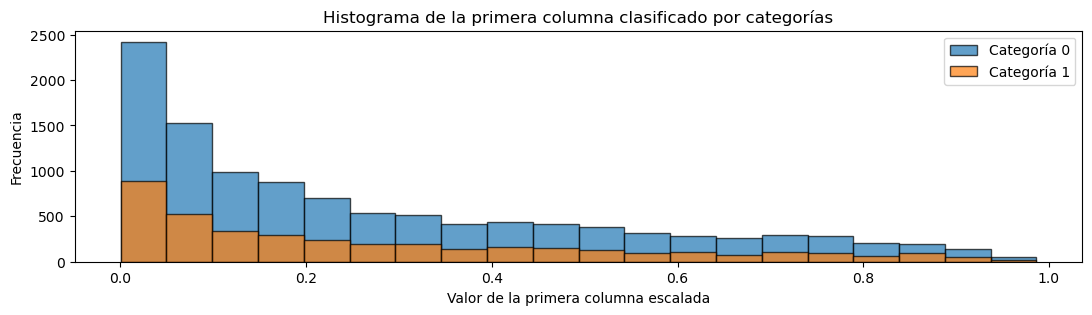

578


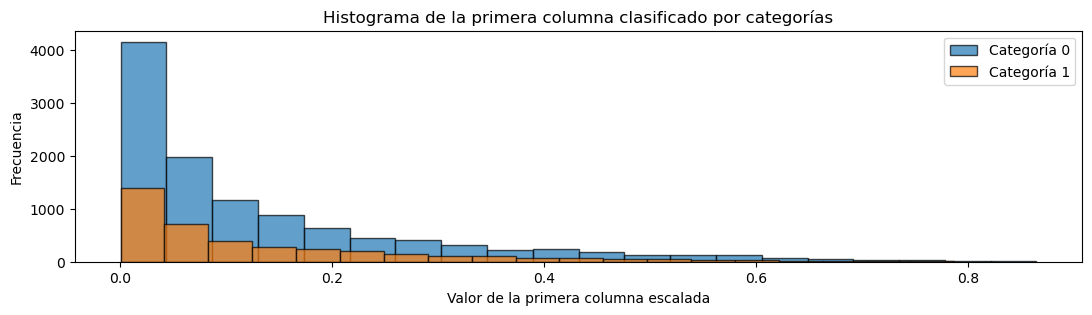

753


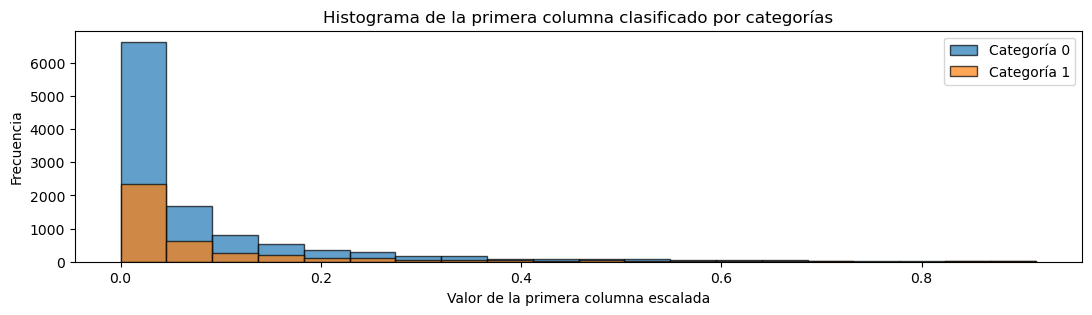

In [50]:
for i in range(3):
    a = sorted_indices_MEAN[i]
    print(a)
    histograma(X_train[:,a],y_train)

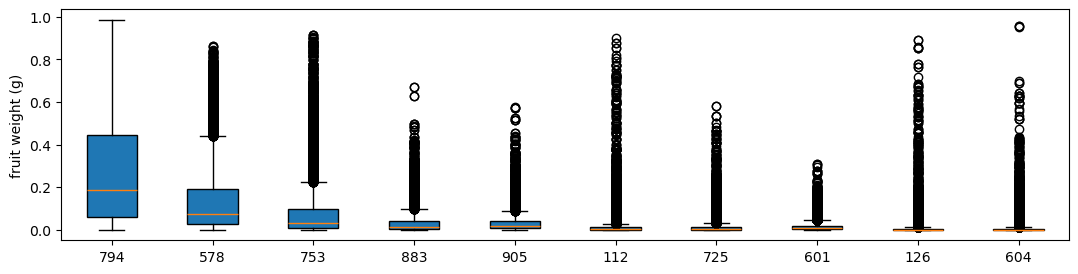

In [45]:
boxPlot(X_train,sorted_indices_MEAN,10)

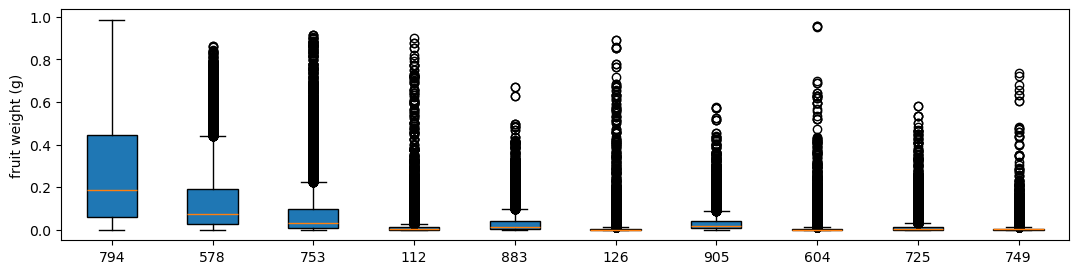

In [53]:
boxPlot(X_train,sorted_indices_STD[::-1],10)